## User-Defined Functions for Statistics

In [25]:
%matplotlib inline 

import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [26]:
df = pd.read_csv('data/final_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    337 non-null    object 
 1   Position  337 non-null    object 
 2   Team      337 non-null    object 
 3   Age       337 non-null    float64
 4   Years     337 non-null    float64
 5   Game      337 non-null    float64
 6   GS        337 non-null    float64
 7   Minutes   337 non-null    float64
 8   FG        337 non-null    float64
 9   3P        337 non-null    float64
 10  2P        337 non-null    float64
 11  FT        337 non-null    float64
 12  DRB       337 non-null    float64
 13  Rebound   337 non-null    float64
 14  Assist    337 non-null    float64
 15  STL       337 non-null    float64
 16  BLK       337 non-null    float64
 17  TOV       337 non-null    float64
 18  PF        337 non-null    float64
 19  Point     337 non-null    float64
 20  salary    337 non-null    int64 

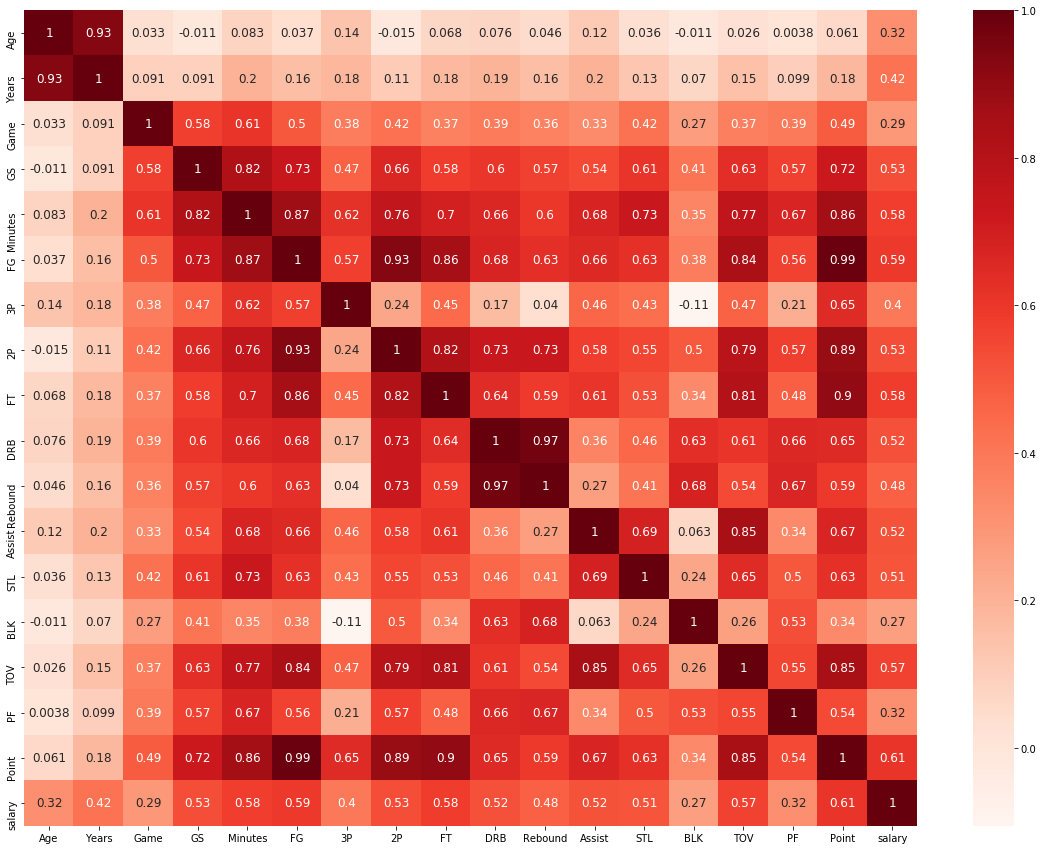

In [27]:
#Let's see the high correlations on the heat map
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='Reds', annot=True, annot_kws={"size": 12})

### Correlations between dependent(salary) and independent variables(stats)

<font color='red'>When we just take a deeper look at the heat map and the correlations between independent variables, 
These independent variables are highly correlated with each other -><font> 

<font color='blue'>'Point' : 'FG' and 'FT' = 0.98, The more attempt the more points.
    
 'Point' : 'Asist'   = 0.64, The more assist to teammate the more shooting trials. 
     
 'Point' : 'Minutes' = 0.85, The longer staying in the game the more chance to score.<font>
    
 <font color='red'>There is also negative correlation between blocks and 3P%, we can easily say that Center players are not good at shooting 3 points because blocks are mostle made by center players. <font>
    


In [28]:
# Let's look at teh correlations with Pearson correlation coefficient r = +1 positive correlation. r = 0 no correlation.
df1=df
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
point_salary=pearson_r(df1['Point'],df1['salary'])
asist_salary=pearson_r(df1['Assist'],df1['salary'])
rebound_salary=pearson_r(df1['Rebound'],df1['salary'])
field_goal_salary=pearson_r(df1['FG'],df1['salary'])
minutes_salary=pearson_r(df1['Minutes'],df1['salary'])
three_point_salary=pearson_r(df1['3P'],df1['salary'])

print("Pearson correlation coefficient between {}".format('point'), "and {}".format('salary'),"is {:0.3f}".format(point_salary))
print("Pearson correlation coefficient between {}".format('minutes'), "and {}".format('salary'),"is {:0.3f}".format(minutes_salary))
print("Pearson correlation coefficient between {}".format('asist'), "and {}".format('salary'),"is {:0.3f}".format(asist_salary))
print("Pearson correlation coefficient between {}".format('field-goal'), "and {}".format('salary'),"is {:0.3f}".format(field_goal_salary))
print("Pearson correlation coefficient between {}".format('rebound'), "and {}".format('salary'),"is {:0.3f}".format(rebound_salary))
print("Pearson correlation coefficient between {}".format('three-points'), "and {}".format('salary'),"is {:0.3f}".format(three_point_salary))


Pearson correlation coefficient between point and salary is 0.611
Pearson correlation coefficient between minutes and salary is 0.580
Pearson correlation coefficient between asist and salary is 0.519
Pearson correlation coefficient between field-goal and salary is 0.594
Pearson correlation coefficient between rebound and salary is 0.476
Pearson correlation coefficient between three-points and salary is 0.397


### T-Test for Salary and other stats(point, asist, rebound, years, age, field goal)

In [29]:
center = df.groupby('Position')['Point', 'Minutes'].mean()
center

C:\Users\mrakk\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Point,Minutes
Position,,
C,9.374648,19.888732
PF,8.860870,20.159420
PG,11.453030,24.027273
SF,10.518367,23.451020
SG,10.253659,21.986585


In [30]:
# mean of salary is way higher than median, which is caused by some superstar players who make far beyond the most players.
print('Median of the salary is: ', df['salary'].median(),'\nMean of the salary is: ', df['salary'].mean())

Median of the salary is:  3940402.0 
Mean of the salary is:  7981258.658753709


## T-Test for salary and point
#### H0 = Null Hypothesis => Salaries of players scoring more than median-point are not significantly different than salaries of those scoring less than median-point.
#### HA = Alternative Hypothesis => There is significant difference.

In [31]:
from statsmodels.stats.weightstats import ztest

median_point = df1['Point'].median()
players_above_median = df1[df1['Point'] > median_point]
players_below_median = df1[df1['Point'] <= median_point]

a, p = ztest(players_above_median['salary'], players_below_median['salary'], value=0)
print("p-value is {:0.3f}".format(p),' and z-test is ', a)

a, p = stats.ttest_ind(players_above_median['salary'], players_below_median['salary'])
print("p-value is {:0.3f}".format(p),' and t-value is', a)

p-value is 0.000  and z-test is  9.224265433676331
p-value is 0.000  and t-value is 9.224265433676331


<font color='blue'>Since p-value is zero, we reject the null hypothesis, and salaries of players score above median point ARE significantly different than those who score less than median point.</font>

## T-Test for salary and position
#### H0 = Null Hypothesis => Salaries of center players are not significantly different than salaries of point guard players.
#### HA = Alternative Hypothesis => There is significant difference between salaries of different positions.

In [32]:
center = df1[df1['Position'] == 'C']
point_guard = df1[df1['Position'] == 'PG']

a, p = stats.ttest_ind(point_guard['salary'], center['salary'])
print("p-value is {:0.3f}".format(p),' and t-value is', a)


p-value is 0.729  and t-value is 0.3476375247383059


<font color='red'>Since p-value is 0.729 more than 0.05, we failed to reject the null hypothesis, and salaries of center players ARE NOT significantly different than point guard players.</font>

## T-Test for center position and rebound
#### H0 = Null Hypothesis => Salaries of center players collecting more rebound than median rebound are not significantly different than salaries of center players collecting less rebound than median rebound.

#### HA = Alternative Hypothesis => There is a significant difference between salaries of Center players collecting less and more rebound than median rebound..

In [33]:
center_above = df1[df1['Position'] == 'C']
center_below = df1[df1['Position'] == 'C']
center_above = center_above[center_above['Rebound'] > 6]
center_below = center_below[center_below['Rebound'] < 6]
a, p = stats.ttest_ind(center_above['salary'], center_below['salary'])
print("p-value is {:0.3f}".format(p),' and t-value is', a)

p-value is 0.000  and t-value is 4.013386960565836


<font color='blue'>Since p-value is 0.000 less than 0.05, we reject the null hypothesis, and salaries of center players collecting more than 6 rebounds ARE significantly different than center players collecting less than 6 rebounds.</font>

## T-Test for C position and PG posiiton based on points and minutes.
#### H0 = Null Hypothesis =>Center players are staying in the game as long as point guard players.
#### H01 = Null Hypothesis =>Center players are scoring per game as much as point guard players.

#### HA = Alternative Hypothesis => There is significant difference between minutes of Center players and minutes of PG players.
#### HA1 = Alternative Hypothesis => There is significant difference between points of Center players and points of PG players.

In [34]:
center = df1[df1['Position'] == 'C']
point_guard = df1[df1['Position'] == 'PG']

a1, p1 = stats.ttest_ind(point_guard['Minutes'], center['Minutes'])
print("p-value is {:0.3f}".format(p1),' and t-value is', a1, 'for minutes')
a2, p2 = stats.ttest_ind(point_guard['Point'], center['Point'])
print("p-value is {:0.3f}".format(p2),' and t-value is', a2, 'for point')

p-value is 0.003  and t-value is 3.0347790335762705 for minutes
p-value is 0.061  and t-value is 1.8856164913874234 for point


<font color='blue'>Since p-value is 0.003 less than 0.05 for minutes, we reject the null hypothesis, and there is a statistically significant difference between minutes of PG and C players.</font>

<font color='blue'>Since p-value is 0.061 more than 0.05, we failed to reject the null hypothesis, and there is a statistically no significant difference between points of PG and C players.</font>

In [35]:
def pearson_r(data_1, data_2):
    r = np.corrcoef(data_1, data_2)[0, 1]
    return r

In [36]:
pearson_r(df['salary'], df['Point'])

0.6106921611036353

In [37]:
MannWhitney_points = stats.stats.mannwhitneyu(df['salary'], df['Point'], alternative = 'greater')
MannWhitney_points

MannwhitneyuResult(statistic=113569.0, pvalue=4.345891726813003e-112)

In [38]:
position = df[['salary','Position']].groupby('Position').mean().sort_values(by = 'salary', ascending = False)
position.head(5)

,salary
Position,
SF,9.108709e+06
PG,8.833254e+06
C,8.284385e+06
PF,7.762332e+06
SG,6.543541e+06


In [39]:
emprical_mean_diff = position['salary'].loc['PG'] - position['salary'].loc['C']
emprical_mean_diff

548869.1338028172

In [40]:
center = df['salary'].loc[df['Position'] =='C']
point_guard = df['salary'].loc[df['Position'] == 'PG']

In [41]:
def permutations(data_1, data_2):
    data = np.concatenate((data_1, data_2))
    perms = np.random.choice(data, len(data))
    perm_team1 = perms[:len(data_1)]
    perm_team2 = perms[len(data_1):]
    return perm_team1, perm_team2

In [42]:
def bootstrap(data_1, data_2, size):
    boots = np.empty(size)
    for i in range(size):
        perm_team1, perm_team2 = permutations(data_1, data_2)
        boots[i] = np.mean(perm_team1) - np.mean(perm_team2)
    return boots

In [43]:
theorical_mean_diffs = bootstrap(center, point_guard, 10000)
p = np.sum(theorical_mean_diffs >= emprical_mean_diff) / float(len(theorical_mean_diffs))
p

0.3706

<font color='blue'>Since p-value is 0.3732 more than 0.05 , we are unable to reject the null hypothesis, and PG and C players have the same average salary.</font>

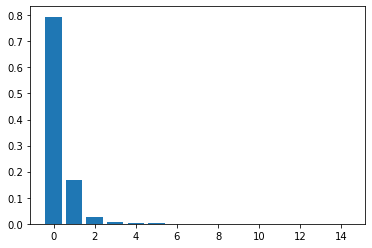

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
model = pca.fit(df[['Game', 'GS', 'Minutes', 'FG',
       '3P', '2P', 'FT', 'DRB', 'Rebound', 'Assist', 'STL', 'BLK', 'TOV', 'PF',
       'Point']])
_ = plt.bar(range(len(model.explained_variance_)), model.explained_variance_ratio_)

There are only one principal component and another one. The rest of the statistics are highly correlated with each other. That is the reason. 

In [45]:
import statsmodels.api as sm
from sklearn.preprocessing import scale

X = (df[['Point','Rebound']])
y = df['salary']
X2 = sm.add_constant(X)

In [46]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.53e-37
Time:                        19:21:22   Log-Likelihood:                -5772.3
No. Observations:                 337   AIC:                         1.155e+04
Df Residuals:                     334   BIC:                         1.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.275e+06   7.43e+05     -1.716      0.0

In [47]:
X = (df[['Rebound', 'Assist', 'Point']])
y = df['salary']
X2 = sm.add_constant(X)

In [48]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     82.57
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.86e-40
Time:                        19:21:22   Log-Likelihood:                -5762.8
No. Observations:                 337   AIC:                         1.153e+04
Df Residuals:                     333   BIC:                         1.155e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.808e+06   7.34e+05     -2.464      0.0

Rebound Assist and point will be used for salary prediction

In [51]:
# Let's define our functions that we will use later on;

# One random sample bootstraping
def bs_1_sample(data):
    return np.random.choice(data, len(data))

# 10,000 bootstrapped samples as a numpy array
def bs_10000_samples(data):    
    bs_array = np.empty(10000)
    for i in range(10000):
        bs_array[i] = bs_1_sample(data)
    return bs_array

# 10,000 means of 10,000 bootstrapped samples as a numpy array
def bs_10000_samples_means(data):    
    bs_array = np.empty(10000)
    for i in range(10000):
        bs_array[i] = np.mean(bs_1_sample(data))
    return bs_array

In [52]:
def replicates(data, func, size):
    bs_array = np.empty(size)
    for i in range(size):
        bs_array[i] = func(np.random.choice(data, len(data)))
    return bs_array

np.random.seed(47)
bootstrapped_means = replicates(df.salary, np.mean, 10000)
print(bootstrapped_means[:3])# To see if it worked

# since we're only calculating the 95% lower confidence interval: 
# np.pecentile requires 5 as the second argument
co_int_low = np.percentile(bootstrapped_means,5)

print("")
print("lower confidence interval", round(co_int_low,1))

[7982483.6231454 6937669.7388724 8320386.4272997]

lower confidence interval 7223865.9


In [87]:
# difference of means of minutes for center and PG players
np.random.seed(47)
minutes_center = replicates(df.Minutes[df.Position=='C'], np.std, 10000)
minutes_pg = replicates(df.Minutes[df.Position=='PG'], np.std, 10000)
diff = salary_center - minutes_center

# to calculate 95% confidence interval,
co_int = np.percentile(diff, [2.5, 97.5])

In [77]:
# difference of means of salaries for center and PG players
np.random.seed(47)
salary_center = replicates(df.salary[df.Position=='C'], np.mean, 10000)
salary_pg = replicates(df.salary[df.Position=='PG'], np.mean, 10000)
diff = salary_pg - salary_center

# to calculate 95% confidence interval,
co_int = np.percentile(diff, [2.5, 97.5])

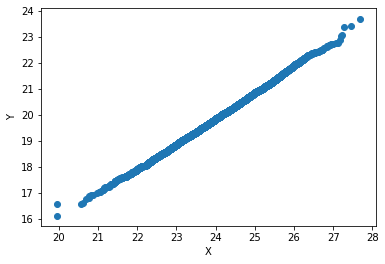

In [81]:
# Generate data for difference of means of minutes for center and PG players

x = minutes_pg
y = minutes_center  

# Quantile-quantile plot for difference of means of minutes for center and PG players
plt.figure()
plt.scatter(np.sort(x), np.sort(y))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.close()

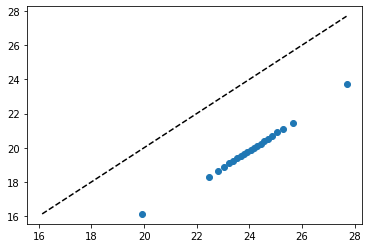

In [82]:
# Quantile-quantile plot for difference of means of minutes for center and PG players
percs = np.linspace(0,100,21)
qn_a = np.percentile(x, percs)
qn_b = np.percentile(y, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

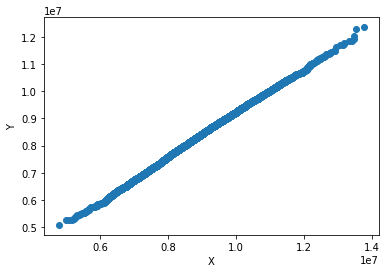

In [79]:
# Generate data for difference of means of salaries for center and PG players
x = salary_pg
y = salary_center  

# Quantile-quantile plot for difference of means of salaries for center and PG players
plt.figure()
plt.scatter(np.sort(x), np.sort(y))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.close()

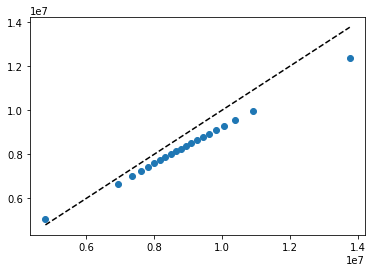

In [80]:
# Quantile-quantile plot for difference of means of salaries for center and PG players
percs = np.linspace(0,100,21)
qn_a = np.percentile(x, percs)
qn_b = np.percentile(y, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

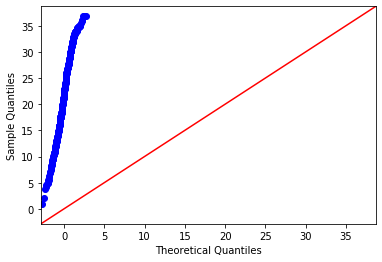

In [95]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
  
# Random data points generated 
data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(df.Minutes, line ='45') 
py.show() 

(array([167.,  45.,  31.,  32.,  15.,  14.,  18.,   4.,   7.,   4.]),
 array([1.70920000e+04, 3.76109820e+06, 7.50510440e+06, 1.12491106e+07,
        1.49931168e+07, 1.87371230e+07, 2.24811292e+07, 2.62251354e+07,
        2.99691416e+07, 3.37131478e+07, 3.74571540e+07]),
 <a list of 10 Patch objects>)

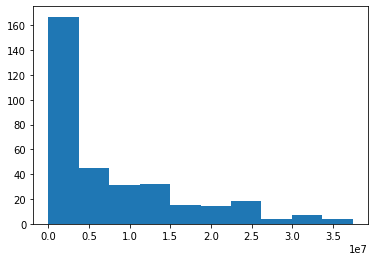

In [93]:
plt.hist(df.salary)

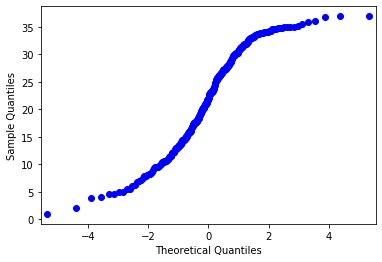

In [96]:
>>> import scipy.stats as stats
>>> fig = sm.qqplot(df.Minutes, stats.t, distargs=(4,))
>>> plt.show()

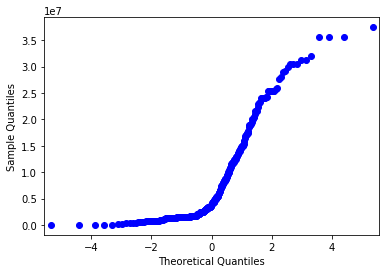

In [99]:
>>> import scipy.stats as stats
>>> fig = sm.qqplot(df.salary, stats.t, distargs=(4,))
>>> plt.show()